<a href="https://colab.research.google.com/github/agrawalkunal2/IPL_T20_CricketAnalysis/blob/main/Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = '/content/drive/MyDrive/Colab Notebooks/Capstone 1/dat/'
df_matches = pd.read_csv(file_location + 'matches.csv')
df_teams = pd.read_csv(file_location +'teams.csv')
df_teamwise = pd.read_csv(file_location +'teamwise_home_and_away.csv')
df_deliveries = pd.read_csv(file_location +'deliveries.csv')
df_mostruns = pd.read_csv(file_location +'most_runs_average_strikerate.csv')
df_players = pd.read_excel(file_location +'Players.xlsx')

In [ ]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df_teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


**DATA CLEANING**      
From Teams csv we can see that some teams have different names. For example **Delhi Daredevils** and **Delhi Capitals** So we have to make name common to these teams.
So we write a code to bring these teams under one name

In [ ]:
#codes for making names common
def change_name(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data

df_matches['team1']=df_matches['team1'].apply(lambda x:change_name(x))
df_matches['team2']=df_matches['team2'].apply(lambda x:change_name(x))
df_matches['toss_winner']=df_matches['toss_winner'].apply(lambda x:change_name(x))
df_matches['winner']=df_matches['winner'].apply(lambda x:change_name(x))
df_deliveries['total_runs']=df_deliveries['total_runs'].apply(lambda x:change_name(x))
df_deliveries['batting_team']=df_deliveries['batting_team'].apply(lambda x:change_name(x))
df_deliveries['bowling_team']=df_deliveries['bowling_team'].apply(lambda x:change_name(x))


***


**COUNTING MATCH WINNERS**

In [ ]:
df_matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

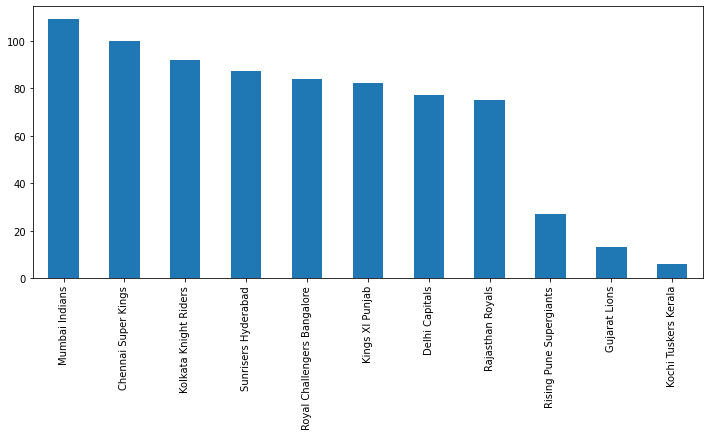

In [ ]:
plt.figure(figsize=(12,5))
wins=df_matches.winner.value_counts()
wins.plot.bar()

**INFERENCE**:   
Mumbai Indians is the most successful team followed by Chennai Super Kings and then Kolkata Knight Riders.

***




**MOST NUMBER OF MAN OF THE MATCH**

In [ ]:
df_matches.player_of_match.value_counts().head(10)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

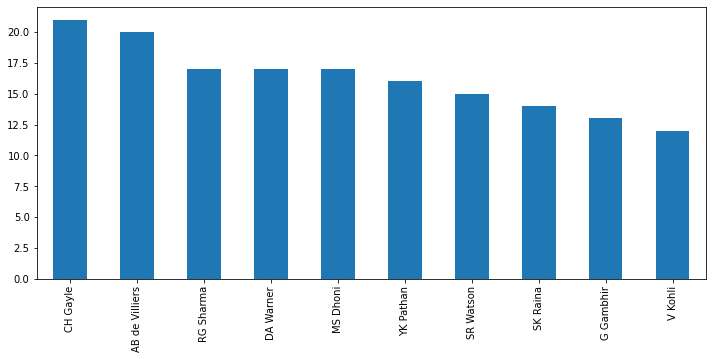

In [ ]:
plt.figure(figsize=(12,5))
df_matches.player_of_match.value_counts().head(10).plot.bar()

**INFERENCE**:    
Chris Gayle is the most successful player in ipl history with 21 times Player of the match awarded followed by AB Devillers with 20 timeS

***

**NUMBER OF TIMES A VENUE WAS USED**

In [ ]:
df_matches.venue.value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

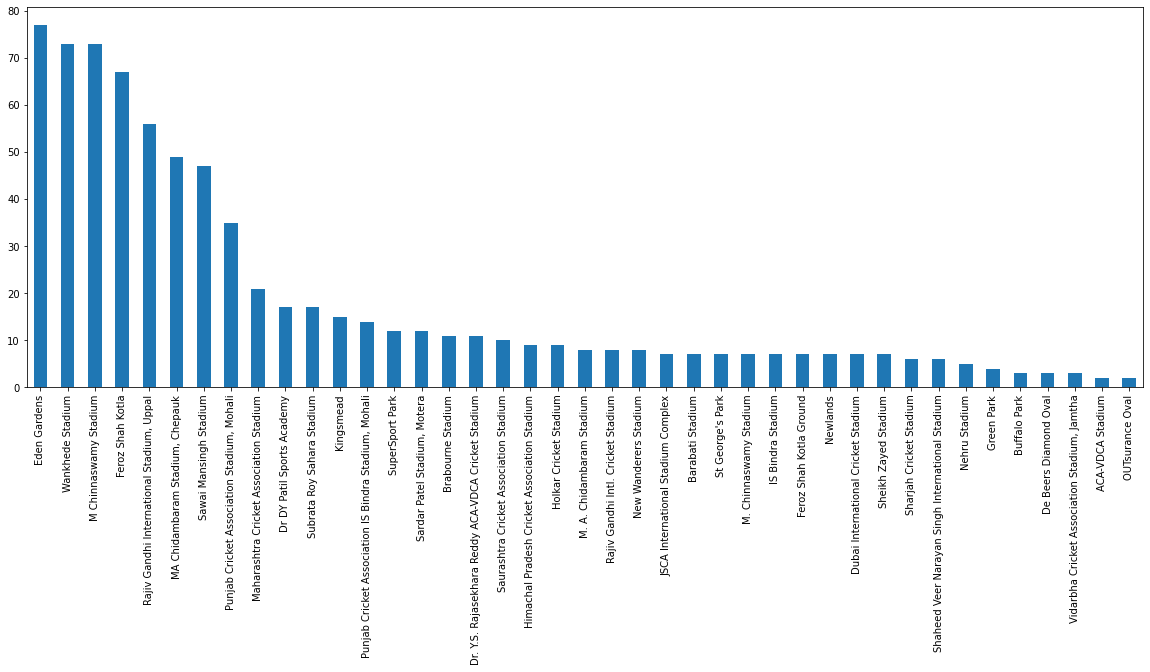

In [ ]:
plt.figure(figsize=(20,7))
df_matches.venue.value_counts().plot.bar()

INFERENCE:
Eden Gardens of kolkata has hosted most no matches of ipl of 77

***

**HIGHEST** **AVERAGE** **BATTING** **SCORE** **TEAMWISE :**

In [ ]:
print(len(df_matches[df_matches['team1']=='Chennai Super Kings']) + len(df_matches[df_matches['team2']=='Chennai Super Kings']))
print(len(df_matches[df_matches['team1']=='Mumbai Indians']) + len(df_matches[df_matches['team2']=='Mumbai Indians']))
print(len(df_matches[df_matches['team1']=='Kolkata Knight Riders']) + len(df_matches[df_matches['team2']=='Kolkata Knight Riders']))
print(len(df_matches[df_matches['team1']=='Rajasthan Royals']) + len(df_matches[df_matches['team2']=='Rajasthan Royals']))
print(len(df_matches[df_matches['team1']=='Royal Challengers Bangalore']) + len(df_matches[df_matches['team2']=='Royal Challengers Bangalore']))
print(len(df_matches[df_matches['team1']=='Kings XI Punjab']) + len(df_matches[df_matches['team2']=='Kings XI Punjab']))
print(len(df_matches[df_matches['team1']=='Sunrisers Hyderabad']) + len(df_matches[df_matches['team2']=='Sunrisers Hyderabad']))
print(len(df_matches[df_matches['team1']=='Delhi Capitals']) + len(df_matches[df_matches['team2']=='Delhi Capitals']))

164
187
178
147
180
176
183
177


In [ ]:
Stat=df_deliveries.groupby('batting_team')['total_runs'].sum()

In [ ]:
print('Chennai average score :',  Stat['Chennai Super Kings']/162)
print('Mumbai average score :',  Stat['Mumbai Indians']/184)
print('Kolkata average score :',  Stat['Kolkata Knight Riders']/177)
print('Rajasthan average score :',  Stat['Rajasthan Royals']/144)
print('Banglore average score :',  Stat['Royal Challengers Bangalore']/175)
print('Punjab average score :',  Stat['Kings XI Punjab']/175)
print('Hyderabad average score :',  Stat['Sunrisers Hyderabad']/106)
print('Delhi average score :',  Stat['Delhi Capitals']/177)

Chennai average score : 163.07407407407408
Mumbai average score : 162.0054347826087
Kolkata average score : 154.909604519774
Rajasthan average score : 155.77083333333334
Banglore average score : 160.72
Punjab average score : 159.38857142857142
Hyderabad average score : 269.07547169811323
Delhi average score : 152.64406779661016


***

**PIE** **CHART** **showing which team has benifitted more from batting first and which team has benifitted from fielding first**

In [ ]:
#team winning batting first
batting_first=df_matches[df_matches['win_by_runs']!=0]

([<matplotlib.patches.Wedge at 0x7f58e9e2b610>,
 [Text(0.9483265621806172, 0.5573838277728304, 'Mumbai Indians'),
  Text(0.02563386044208945, 1.0997012799841763, 'Chennai Super Kings'),
  Text(-0.8677229520271819, 0.6760598187477445, 'Sunrisers Hyderabad'),
  Text(-1.089263137375853, -0.15331607076270107, 'Kings XI Punjab'),
  Text(-0.7426240445397653, -0.8114860001696893, 'Kolkata Knight Riders'),
  Text(-0.087071681803053, -1.096548458677494, 'Royal Challengers Bangalore'),
  Text(0.5351331930271921, -0.9610579929018447, 'Delhi Capitals'),
  Text(0.9377702096019608, -0.5749669851244458, 'Rajasthan Royals'),
  Text(1.0827902674089196, -0.1938175348221124, 'Rising Pune Supergiants'),
  Text(1.0992353332270326, -0.04100831848850801, 'Kochi Tuskers Kerala'),
  Text(1.0999522031572349, -0.010254304927465464, 'Gujarat Lions')],
 [Text(0.5172690339167002, 0.3040275424215438, '16.9%'),
  Text(0.013982105695685153, 0.5998370618095507, '15.4%'),
  Text(-0.4733034283784628, 0.3687599011351333, 

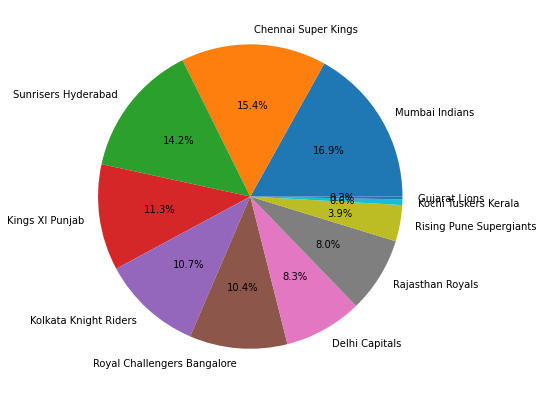

In [ ]:
#making a pie chart for teams winning batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')

**INFERENCE**     
It seems as if batting firt paid well for CSK,MI,SRH as they have consolidated their core batting lineup over the years

In [ ]:
#extracting values for teams winning batting second
batting_second=df_matches[df_matches['win_by_wickets']!=0]

([<matplotlib.patches.Wedge at 0x7f58e9dba490>,
 [Text(0.9983329623836416, 0.4618780101047276, 'Kolkata Knight Riders'),
  Text(0.34315510477407346, 1.0451050540818827, 'Mumbai Indians'),
  Text(-0.469589129872304, 0.994729133536247, 'Royal Challengers Bangalore'),
  Text(-1.0186933326018242, 0.415046857731256, 'Delhi Capitals'),
  Text(-1.031049730514229, -0.3833229098378233, 'Chennai Super Kings'),
  Text(-0.5152492431956529, -0.9718632709318256, 'Rajasthan Royals'),
  Text(0.2114679624153094, -1.079481959493496, 'Kings XI Punjab'),
  Text(0.798595087518538, -0.756469355751612, 'Sunrisers Hyderabad'),
  Text(1.0310497619173464, -0.3833228253707096, 'Rising Pune Supergiants'),
  Text(1.0868537130148221, -0.1695553198985365, 'Gujarat Lions'),
  Text(1.0994731412635472, -0.03404132253700209, 'Kochi Tuskers Kerala')],
 [Text(0.544545252209259, 0.25193346005712414, '13.8%'),
  Text(0.18717551169494914, 0.5700573022264813, '12.3%'),
  Text(-0.2561395253848931, 0.5425795273834074, '11.8%'),

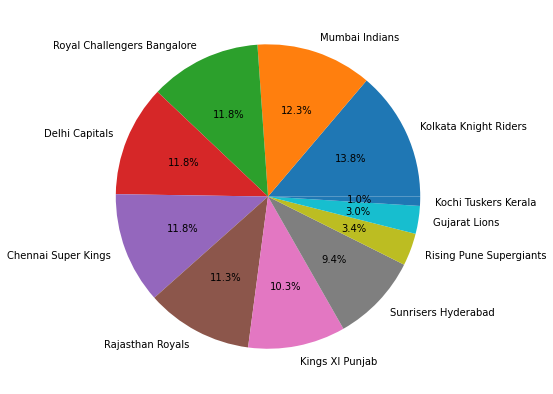

In [ ]:
#piechart for teams winning batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')

**INFERENCES**  
Chases have benifitted KKR,RCB,MI as they have chunk of good finishers at the end.Whereas Batting first have benifitted MI,CSK and SRH as the have relatively better top orders and a good indian core batting

 ***



**PERFORMANCE OF EACH TEAMS YEAR WISE**

In [ ]:
performance=df_matches.pivot_table(index=['winner','Season'],aggfunc='size')
performance=pd.DataFrame(performance)
performance.rename(columns={0:'wins'},inplace=True)
performance.reset_index(inplace=True)
CSK=performance[performance['winner'] == 'Chennai Super Kings']
RCB=performance[performance['winner']=='Royal Challengers Bangalore']
MI=performance[performance['winner']=='Mumbai Indians']
KKR=performance[performance['winner']=='Kolkata Knight Riders']
KXIP=performance[performance['winner']=='Kings XI Punjab']
RR=performance[performance['winner']=='Rajasthan Royals']
DD=performance[performance['winner']=='Delhi Capitals']
SRH=performance[performance['winner']=='Sunrisers Hyderabad']

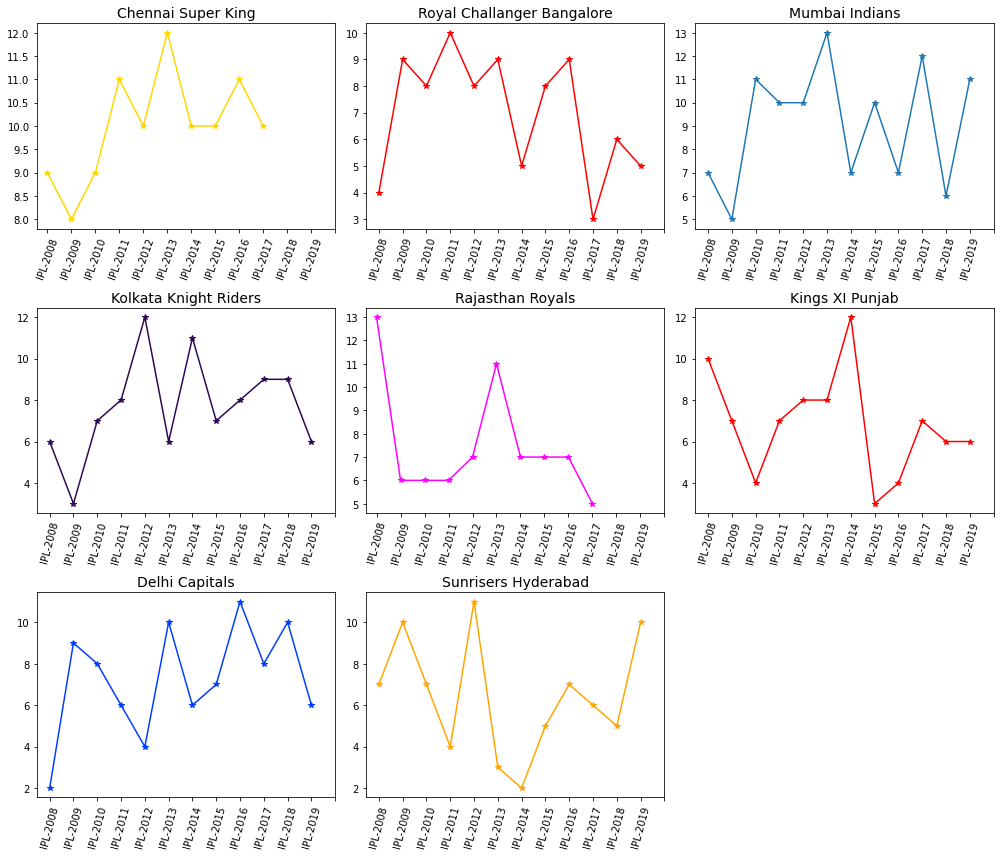

In [ ]:
fig = plt.figure(figsize=(14,12))
#  subplot #1
plt.subplot(331)
plt.title('Chennai Super King', fontsize=14)
plt.plot(CSK['Season'],CSK['wins'],'-*',color='#FFD700')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=70)
#  subplot #2
plt.subplot(332)
plt.title('Royal Challanger Bangalore', fontsize=14)
plt.plot(RCB['Season'],RCB['wins'],'-*',color='red')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)

#  subplot #3
plt.subplot(333)
plt.title('Mumbai Indians', fontsize=14)
plt.plot(MI['Season'],MI['wins'],'-*')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)

#  subplot #4
plt.subplot(334)
plt.title('Kolkata Knight Riders', fontsize=14)
plt.plot(KKR['Season'],KKR['wins'],'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)

#  subplot #5
plt.subplot(335)
plt.title('Rajasthan Royals', fontsize=14)
plt.plot(RR['Season'],RR['wins'],'-*',color='magenta')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)
#subplot 6
plt.subplot(336)
plt.title('Kings XI Punjab', fontsize=14)
plt.plot(KXIP['Season'],KXIP['wins'],'-*',color='red')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)

#subplot 7
plt.subplot(337)
plt.title('Delhi Capitals', fontsize=14)
plt.plot(SRH['Season'],SRH['wins'],'-*',color='#003EFF')
plt.xticks(ticks=np.arange(13),labels=SRH['Season'], rotation=75)
#subplot 8
plt.subplot(338)
plt.title('Sunrisers Hyderabad', fontsize=14)
plt.plot(DD['Season'],DD['wins'],'-*',color='#FFA500')
plt.xticks(ticks=np.arange(13),labels= DD['Season'], rotation=75)
plt.tight_layout()
plt.show()

**INFERENCE**    
Some teams worth talking about:   
**RR**- They started from the top but after one successful season,they are constantly on rock bottom   
**RCB**- We see them winning large chunk of matches in most of the seasons.Due to this reason though they havent won any title cup but their entertainment value is among topthree.  
**MI**-There have been lots of up downs for this team at every consecutive season,they have been really unpredictable and so they have always been at the extreme ends of the points table

***

**This analysis shows that over the years which cities have hosted the matches and how many times**

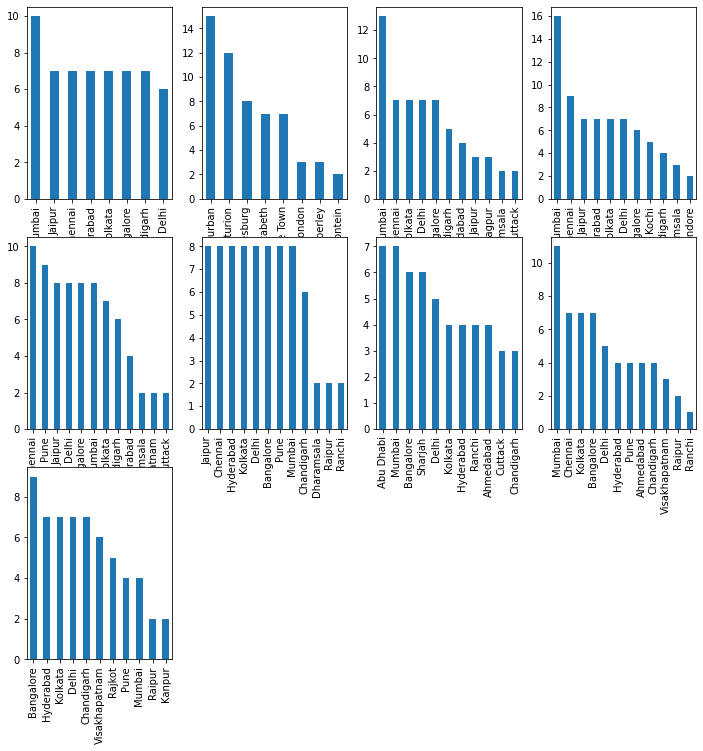

In [ ]:
IPL1=df_matches[df_matches['Season']=='IPL-2008']
IPL2=df_matches[df_matches['Season']=='IPL-2009']
IPL3=df_matches[df_matches['Season']=='IPL-2010']
IPL4=df_matches[df_matches['Season']=='IPL-2011']
IPL5=df_matches[df_matches['Season']=='IPL-2012']
IPL6=df_matches[df_matches['Season']=='IPL-2013']
IPL7=df_matches[df_matches['Season']=='IPL-2014']
IPL8=df_matches[df_matches['Season']=='IPL-2015']
IPL9=df_matches[df_matches['Season']=='IPL-2016']
IPL10=df_matches[df_matches['Season']=='IPL-2017']
IPL11=df_matches[df_matches['Season']=='IPL-2018']
IPL12=df_matches[df_matches['Season']=='IPL-2019']

plt.figure(figsize=(12,12))
plt.subplot(341)
IPL1['city'].value_counts().plot.bar()
plt.subplot(342)
IPL2['city'].value_counts().plot.bar()
plt.subplot(343)
IPL3['city'].value_counts().plot.bar()
plt.subplot(344)
IPL4['city'].value_counts().plot.bar()
plt.subplot(345)
IPL5['city'].value_counts().plot.bar()
plt.subplot(346)
IPL6['city'].value_counts().plot.bar()
plt.subplot(347)
IPL7['city'].value_counts().plot.bar()
plt.subplot(348)
IPL8['city'].value_counts().plot.bar()
plt.subplot(349)
IPL9['city'].value_counts().plot.bar()





***

In [ ]:
# Analyzing the data which is present in deliveries dataframe
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# Finding out the columns associated with the df
df_deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [ ]:
# Looking at the structure of df
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
# finding the unique names of teams
df_deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala'], dtype=object)

Doing some basic analysis on data

**Most 4 Hits by a batsman (Top 10)**

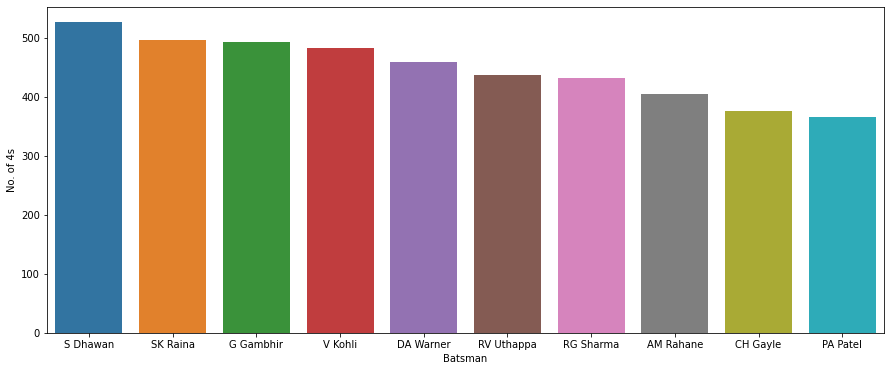

In [ ]:
plt.figure(figsize=(15,6))
boundries_4 = df_deliveries[df_deliveries['batsman_runs'] == 4]['batsman'].value_counts()[:10]
sns.barplot(y=boundries_4,x=boundries_4.index,orient='v')
plt.xlabel('Batsman')
plt.ylabel('No. of 4s')
plt.show()

**Most 6's by Batsman (Top 10)**

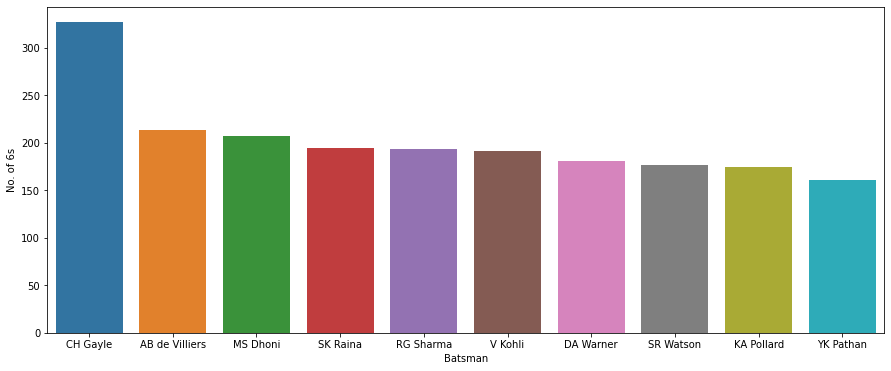

In [ ]:
plt.figure(figsize=(15,6))
boundries_6 = df_deliveries[df_deliveries['batsman_runs'] == 6]['batsman'].value_counts()[:10]
sns.barplot(y=boundries_6,x=boundries_6.index,orient='v')
plt.xlabel('Batsman')
plt.ylabel('No. of 6s')
plt.show()

It can be easy seen that when it comes to 6s, **Chris Gayle** trumps all other players. But when it comes to 4s, Indian Batsman take lead, with **Shikhar Dhawan, Raina and Gambhir** leading the charge.

**Highest Totals by IPL teams in an Innings (Top 10)**

In [ ]:
highest_team_score = df_deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().droplevel(level=0).sort_values(ascending=False)[:10]
highest_team_score = highest_team_score.reset_index()
highest_team_score.index = np.arange(1, len(highest_team_score) + 1)
highest_team_score

,batting_team,total_runs
1,Royal Challengers Bangalore,263
2,Kolkata Knight Riders,250
3,Royal Challengers Bangalore,248
4,Chennai Super Kings,246
5,Kolkata Knight Riders,241
6,Chennai Super Kings,240
7,Royal Challengers Bangalore,235
8,Sunrisers Hyderabad,233
9,Kings XI Punjab,232
10,Sunrisers Hyderabad,232


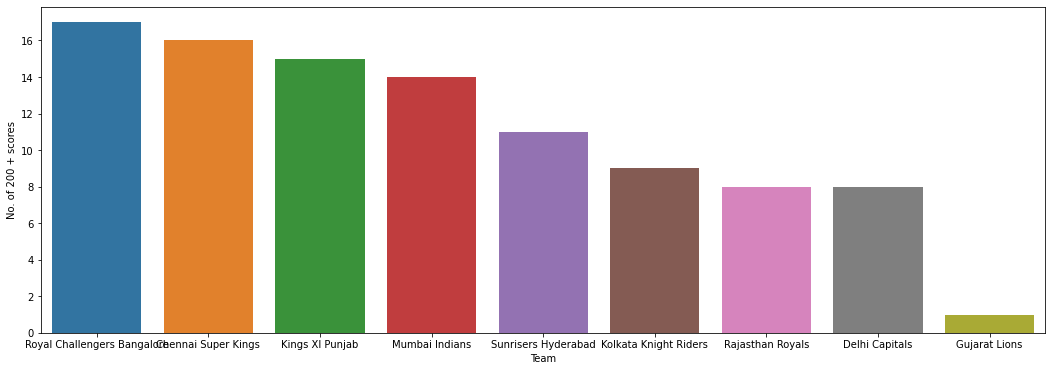

In [ ]:
# looking at teams with most number innings score of 200+
plt.figure(figsize=(18,6))
scores = df_deliveries.groupby(['batting_team','match_id'])['total_runs'].sum()
scores_200 = scores[scores > 200].droplevel(level=1).groupby('batting_team').count().sort_values(ascending=False)
sns.barplot(y=scores_200,x=scores_200.index,orient='v')
plt.xlabel('Team')
plt.ylabel('No. of 200 + scores')
plt.show()

It can be observed Royal Challengers Bangalore does PLAY BOLD and are the leaders when it comes to 200+ scores, narrowly followed by Chennai Superkings. Kochi Tuskers have never scored more than 200+ runs on an innings which is clearly evident from the above plot. However, one important point is that *Mumbai Indians*, team with most number of IPL trophies are in *fourth position when comes to 200+ scores*. This brings us to an interesting question, **is there any correlation between team winning percentage and number of times any team has scored more than 200+ score?**

In [ ]:
# now creating a new dataframe to calculate win percentage of IPL teams
# matches played by each team
total_team_matches = df_deliveries.groupby(['bowling_team','match_id']).count().droplevel(level=1).index.value_counts().reset_index()
# number of times a team have won the matches
winners_df = df_matches.winner.value_counts().reset_index()
# merging bothe above created dataframes
matches_winners_df = pd.merge(total_team_matches,winners_df,on='index')
# and thus calculating the win percentage
# win percentage
matches_winners_df['win_percent'] = round(100* matches_winners_df['winner']/matches_winners_df['bowling_team'],2)
matches_winners_df.rename(columns={'index':'team','bowling_team':'matches_played','winner':'matches_won'},inplace=True)
matches_winners_df

,team,matches_played,matches_won,win_percent
0,Mumbai Indians,187,109,58.29
1,Sunrisers Hyderabad,183,87,47.54
2,Royal Challengers Bangalore,179,84,46.93
3,Kolkata Knight Riders,178,92,51.69
4,Delhi Capitals,176,77,43.75
5,Kings XI Punjab,176,82,46.59
6,Chennai Super Kings,164,100,60.98
7,Rajasthan Royals,147,75,51.02
8,Rising Pune Supergiants,76,27,35.53
9,Gujarat Lions,30,13,43.33


In [ ]:
# now checking what is the average of teams in poweplay overs
powerplay_df = df_deliveries[df_deliveries['over']<6].groupby(['match_id','batting_team']).sum()['total_runs'].groupby('batting_team').mean().sort_values(ascending=False).reset_index()
# joining the matches_winners_df with powerplay_df
matches_winners_df['avg_powerplay_score'] = matches_winners_df.team.map(powerplay_df.set_index('batting_team')['total_runs'])

In [ ]:
# also creating new dataframe that will show us number of times teams are scoring 200+ in an innings
scores_200_df = scores_200.to_frame().reset_index()
scores_200_df.rename(columns={'batting_team':'team','total_runs': 'No. of 200+ scores'}, inplace=True)
team_200_powerplay_win_df = pd.merge(matches_winners_df,scores_200_df,how='left',on='team')
team_200_powerplay_win_df['No. of 200+ scores'] = team_200_powerplay_win_df['No. of 200+ scores'].fillna(0)

In [ ]:
team_200_powerplay_win_df['No. of 200+ scores'] = team_200_powerplay_win_df['No. of 200+ scores'].astype(int)
team_200_powerplay_win_df

,team,matches_played,matches_won,win_percent,avg_powerplay_score,No. of 200+ scores
0,Mumbai Indians,187,109,58.29,36.818182,14
1,Sunrisers Hyderabad,183,87,47.54,38.868852,11
2,Royal Challengers Bangalore,179,84,46.93,37.355556,17
3,Kolkata Knight Riders,178,92,51.69,39.179775,9
4,Delhi Capitals,176,77,43.75,38.954802,8
5,Kings XI Punjab,176,82,46.59,38.392045,15
6,Chennai Super Kings,164,100,60.98,36.926829,16
7,Rajasthan Royals,147,75,51.02,37.157534,8
8,Rising Pune Supergiants,76,27,35.53,35.840000,0
9,Gujarat Lions,30,13,43.33,42.166667,1


**Over here we will try to find out if there is any correlation between win percentage with average powerplay score and number of times the team has scored more than 200 runs in an innings. Also, we will try to plot a graph and try to figure out what is average powerplay scores' relationship with number of times team scoring more than 200 runs**

In [ ]:
corr_df = team_200_powerplay_win_df.corr()
corr_df

,matches_played,matches_won,win_percent,avg_powerplay_score,No. of 200+ scores
matches_played,1.000000,0.965434,0.564737,-0.310129,0.860723
matches_won,0.965434,1.000000,0.754932,-0.336426,0.891444
win_percent,0.564737,0.754932,1.000000,-0.188418,0.698114
avg_powerplay_score,-0.310129,-0.336426,-0.188418,1.000000,-0.293885
No. of 200+ scores,0.860723,0.891444,0.698114,-0.293885,1.000000


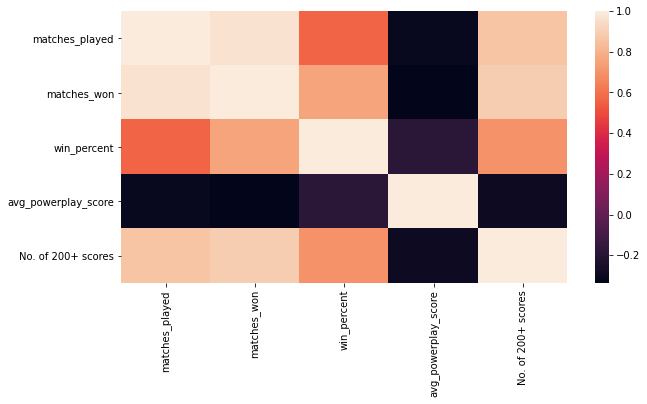

In [ ]:
# Corelation heat map
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

Text(0.5, 0, 'teams')

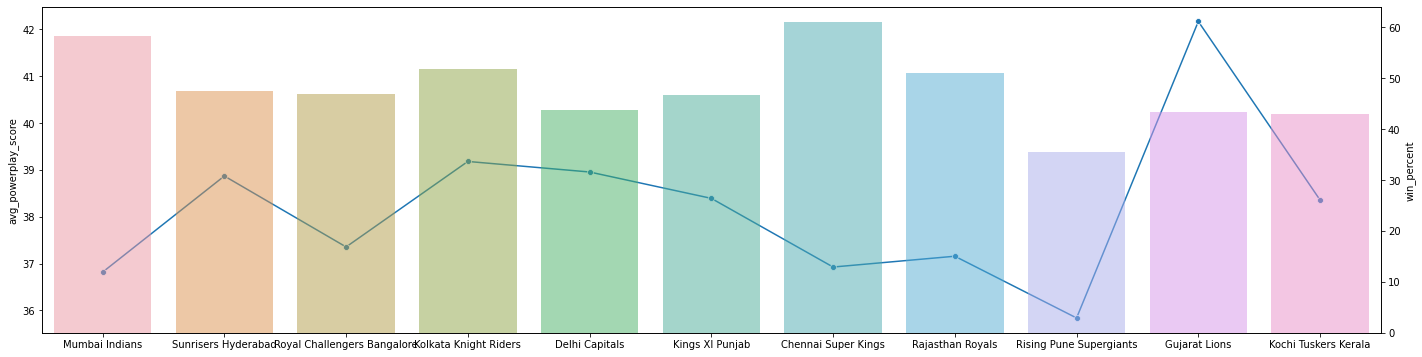

In [ ]:
# creating a graph showing average powerplay score as line graph and win percentage as bars
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(24,6))

sns.lineplot(data = team_200_powerplay_win_df['avg_powerplay_score'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = team_200_powerplay_win_df, x='team', y='win_percent', alpha=0.5, ax=ax2)
plt.xlabel('teams')

Looking at the above graph it can be concluded that teams with higher win percentage tend to have more number of times scored more than 200+ scores in an innings. However, looking at correlation between average powerplay scores and the number of times teams have scored more than 200+ runs, we can see that it is is bit negative. We may infer from this that, team have tried to played steady during the initial powerplay overs and down the line power-hitters have helped their teams to score more than 200 runs. That is why we can see that teams like to keep power hitters at their middle order and depending upon match situation they change the positions of their power-hitters. We can also obseve this fact in the plot above as Mumbai Indians and Chennai Superkings, teams with very high Win percentage have maintained low average powerplay scores.

**Running between the wickets**: Creating list of players who were run out most number of times depending upon the number of number of innings they have played. Here we will take percentage times a batsman got runout per innings played

In [ ]:
# creating a df of runouts
run_outs_df = df_deliveries[df_deliveries['dismissal_kind']=='run out']['player_dismissed'].value_counts().reset_index()
# creating a df for number of inning played by the batsman
batsman_innings_df = df_deliveries.groupby(['batsman','match_id']).count().droplevel(level=1).index.value_counts()
batsman_innings_df=batsman_innings_df.reset_index()
runout_batsman = pd.merge(run_outs_df,batsman_innings_df,on="index",how='left')
runout_batsman.dropna(axis=0,inplace=True)
runout_batsman.rename(columns={"batsman":"innings_played","player_dismissed":"num_of_times_runouts","index":"batsman"}, inplace=True)
runout_batsman['innings_played'] = runout_batsman['innings_played'].astype(int)
# Calculating a new column with the percentage of times batsman got runout per innings
runout_batsman['percent_runout_per_innings'] = round(100*runout_batsman['num_of_times_runouts']/runout_batsman['innings_played'],2)

In [ ]:
runout_batsman.sort_values('percent_runout_per_innings',ascending=False)[:10]

,batsman,num_of_times_runouts,innings_played,percent_runout_per_innings
152,J Yadav,2,2,100.0
289,S Tyagi,1,1,100.0
260,VS Yeligati,1,1,100.0
285,DJ Muthuswami,1,1,100.0
176,C Nanda,1,1,100.0
247,SS Shaikh,1,1,100.0
177,H Das,1,1,100.0
220,AA Noffke,1,1,100.0
94,L Ronchi,3,5,60.0
200,VRV Singh,1,2,50.0


Over here we can observe that for few players, runout percentage is very high but at the same time, we can also see that they have played very less number of innings; thus analysis on this won't provide us correct results. As a fact we will take only those players who have played more than 10 innings. This we will help us to provide better analysis of the players with their "running-between-wickets"

In [ ]:
df_mostruns.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


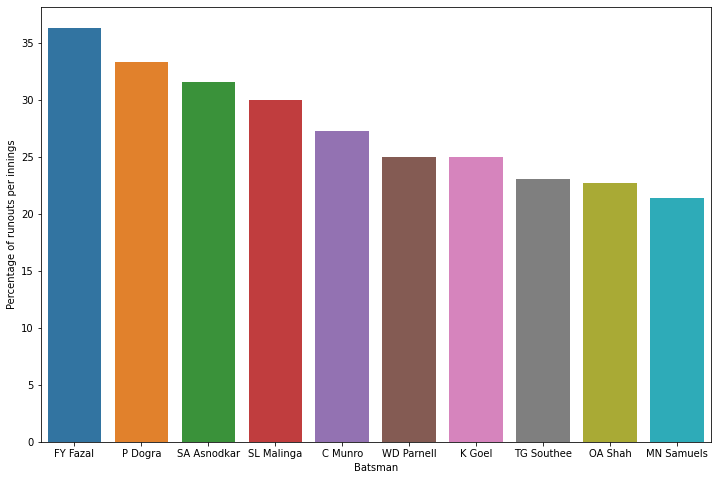

In [ ]:
runout_batsman_more_10_innings= runout_batsman[runout_batsman['innings_played']>10]
plt.figure(figsize=(12,8))
runout_percentage = runout_batsman_more_10_innings.sort_values('percent_runout_per_innings',ascending=False)[:10]
sns.barplot(y=runout_percentage['percent_runout_per_innings'],x=runout_percentage['batsman'])
plt.xlabel('Batsman')
plt.ylabel('Percentage of runouts per innings')
plt.show()

This graph provides info about top 10 players who are prone to getting runouts. They need to work on their fitness and running between the wickets.

**Bowling Statistics**

In [ ]:
bowler_df = pd.DataFrame(df_deliveries['bowler'].value_counts())
bowler_df

,bowler
Harbhajan Singh,3451
A Mishra,3172
PP Chawla,3157
R Ashwin,3016
SL Malinga,2974
...,...
C Ganapathy,6
H Vihari,6
SPD Smith,2
SN Khan,2


Here we can see that there are some bowlers, who have done very less number of balls. Such as players like AC Gilchrist, who are wicket-keeper and have done balling just for mere enjoyment. Thus we will be consider only those bowlers who have bowled atleast 120 deliveries

In [ ]:
# Creating bowlers df using dict
bowlers_dict = {}
for bowler in df_deliveries['bowler']:
  if bowler not in bowlers_dict.keys():
    bowlers_dict[bowler] = 1
  else:
    bowlers_dict[bowler] += 1 
bowlers_df = pd.DataFrame.from_dict(bowlers_dict, orient='index').mean(axis=1).reset_index().rename(columns={'index':'bowler',0:'num_of_deliveries'}).sort_values(by=['num_of_deliveries'], ascending=False)
# creating new dict with bowlers who have done atleast 120 balls
regular_bowlers_df = bowlers_df[bowlers_df['num_of_deliveries']>120]

totalruns_by_bowlers_df = pd.pivot_table(df_deliveries, index=['bowler'],values=['noball_runs','wide_runs','batsman_runs','extra_runs'],aggfunc=np.sum)

# doing a left join between regular bowlers df and total runs by bowlers df
regular_bowlers = pd.merge(regular_bowlers_df, totalruns_by_bowlers_df, on ='bowler', how ='left')
regular_bowlers

,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs
0,Harbhajan Singh,3451.0,3880,170,3,96
1,A Mishra,3172.0,3727,123,20,57
2,PP Chawla,3157.0,4022,131,1,63
3,R Ashwin,3016.0,3224,167,2,111
4,SL Malinga,2974.0,3218,293,20,152
...,...,...,...,...,...,...
236,S Ladda,141.0,221,4,1,2
237,V Sehwag,138.0,233,3,1,1
238,P Amarnath,132.0,236,5,0,0
239,R Shukla,130.0,198,19,3,7


In [ ]:
# creating a new column in regular_bowlers with the name bowler_runs as while calculating economy of bowlers, we need not include bye runs and leg-bye runs
regular_bowlers['bowler_runs'] = regular_bowlers['batsman_runs'] + regular_bowlers['noball_runs'] + regular_bowlers['wide_runs']
regular_bowlers

,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs,bowler_runs
0,Harbhajan Singh,3451.0,3880,170,3,96,3979
1,A Mishra,3172.0,3727,123,20,57,3804
2,PP Chawla,3157.0,4022,131,1,63,4086
3,R Ashwin,3016.0,3224,167,2,111,3337
4,SL Malinga,2974.0,3218,293,20,152,3390
...,...,...,...,...,...,...,...
236,S Ladda,141.0,221,4,1,2,224
237,V Sehwag,138.0,233,3,1,1,235
238,P Amarnath,132.0,236,5,0,0,236
239,R Shukla,130.0,198,19,3,7,208


Now we will be adding few more columns in regular bowler df for certain analysis pertaining to regular bowler statistics

In [ ]:
# Economy Rate column
regular_bowlers['economy'] = round(regular_bowlers['bowler_runs']/ (regular_bowlers['num_of_deliveries']//6),2)

In [ ]:
# fetching wickets taken by bowlers
bowlers_wict_dict = {}
for index, rows in df_deliveries.iterrows():
  wicket = df_deliveries.loc[index,'dismissal_kind']
  if (wicket not in ["run out","obstructing the feild","retired hurt",np.nan]):
      bowler_name = df_deliveries.loc[index,'bowler']
      if bowler_name not in bowlers_wict_dict.keys():
        bowlers_wict_dict[bowler_name] = 1
      else:
        bowlers_wict_dict[bowler_name] += 1

wickets_df = pd.DataFrame.from_dict(bowlers_wict_dict, orient='index').mean(axis=1).reset_index().rename(columns={'index':'bowler',0:'Wickets'}).sort_values(by=['Wickets'], ascending=False)

# now doing left join between regular bowlers dataframe and wickets dataframe
regular_bowlers = pd.merge(regular_bowlers, wickets_df, on ='bowler', how ='left')

In [ ]:
# determining strike rate and bowling average of each bowler
regular_bowlers['strike_rate'] = round(regular_bowlers['num_of_deliveries']/regular_bowlers['Wickets'],2)
regular_bowlers['bowling_average'] = round(regular_bowlers['batsman_runs']/regular_bowlers['Wickets'],2)

regular_bowlers[["num_of_deliveries","Wickets"]] = regular_bowlers[["num_of_deliveries","Wickets"]].astype(int)
regular_bowlers

,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs,bowler_runs,economy,Wickets,strike_rate,bowling_average
0,Harbhajan Singh,3451,3880,170,3,96,3979,6.92,150,23.01,25.87
1,A Mishra,3172,3727,123,20,57,3804,7.20,156,20.33,23.89
2,PP Chawla,3157,4022,131,1,63,4086,7.77,149,21.19,26.99
3,R Ashwin,3016,3224,167,2,111,3337,6.65,125,24.13,25.79
4,SL Malinga,2974,3218,293,20,152,3390,6.85,170,17.49,18.93
...,...,...,...,...,...,...,...,...,...,...,...
236,S Ladda,141,221,4,1,2,224,9.74,5,28.20,44.20
237,V Sehwag,138,233,3,1,1,235,10.22,6,23.00,38.83
238,P Amarnath,132,236,5,0,0,236,10.73,7,18.86,33.71
239,R Shukla,130,198,19,3,7,208,9.90,5,26.00,39.60


**Creating few graphs to fetch bowling statistics**

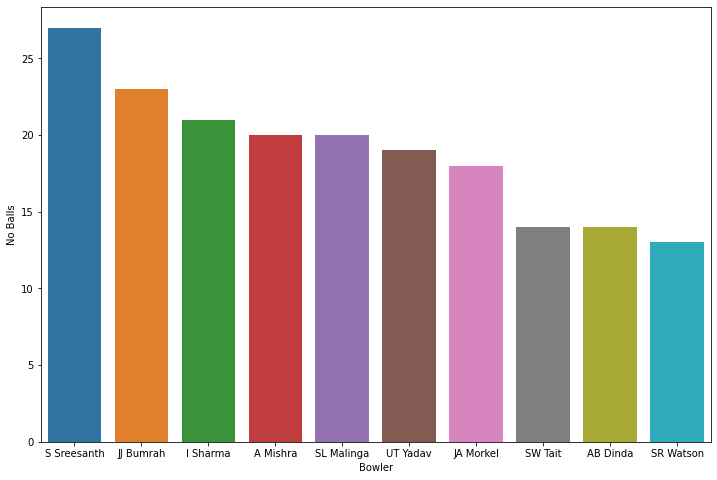

In [ ]:
# Most no balls bowled
no_balls_df = regular_bowlers[["bowler","noball_runs"]]
no_balls_df = no_balls_df.sort_values('noball_runs',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=no_balls_df['noball_runs'],x=no_balls_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('No Balls')
plt.show()

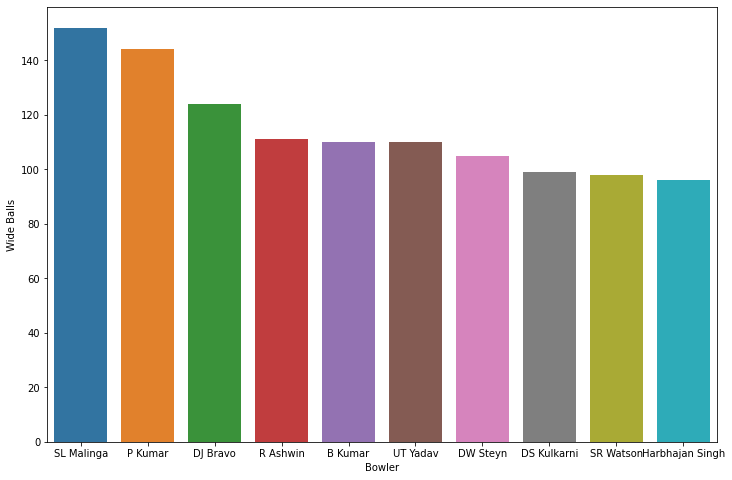

In [ ]:
# most number of wide balls
wide_balls_df = regular_bowlers[["bowler","wide_runs"]]
wide_balls_df = wide_balls_df.sort_values('wide_runs',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=wide_balls_df['wide_runs'],x=wide_balls_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Wide Balls')
plt.show()

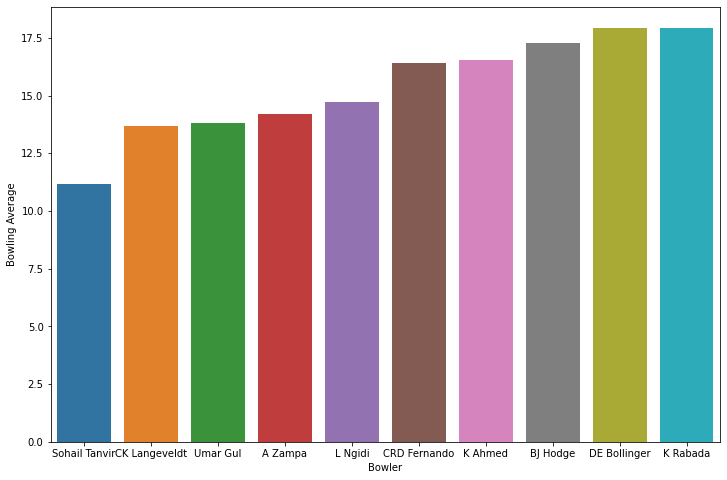

In [ ]:
# Top 10 bowlers with best average
bowling_average_df = regular_bowlers[["bowler","bowling_average"]]
bowling_average_df = bowling_average_df.sort_values('bowling_average',ascending=True)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=bowling_average_df['bowling_average'],x=bowling_average_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Bowling Average')
plt.show()

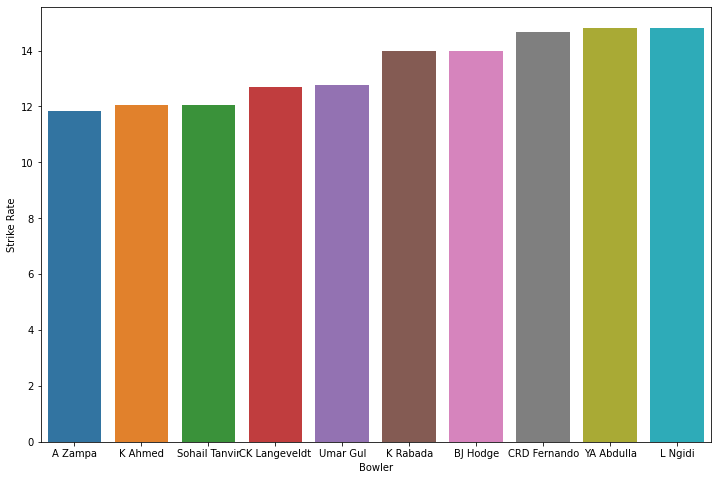

In [ ]:
# Top 10 bowlers in terms of strike rate
strike_rate_df = regular_bowlers[["bowler","strike_rate"]]
strike_rate_df = strike_rate_df.sort_values('strike_rate',ascending=True)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=strike_rate_df['strike_rate'],x=strike_rate_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Strike Rate')
plt.show()

In [ ]:
# Players with best bowling averages and strike rates
df3=pd.merge(bowling_average_df,strike_rate_df, how='inner')
df3

,bowler,bowling_average,strike_rate
0,Sohail Tanvir,11.18,12.05
1,CK Langeveldt,13.69,12.69
2,Umar Gul,13.83,12.75
3,A Zampa,14.21,11.84
4,L Ngidi,14.73,14.82
5,CRD Fernando,16.41,14.65
6,K Ahmed,16.55,12.05
7,BJ Hodge,17.29,14.00
8,K Rabada,17.94,14.00


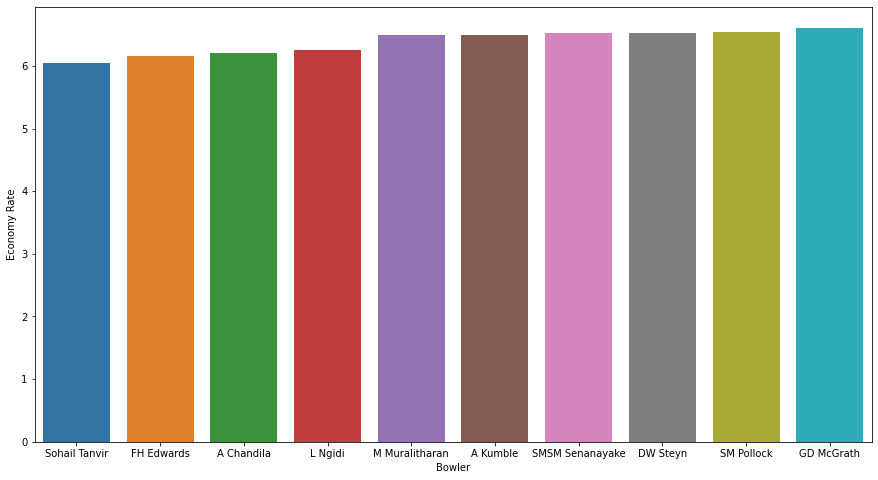

In [ ]:
# Top 10 bowlers in terms of economy rate
economy_rate_df = regular_bowlers[["bowler","economy"]]
economy_rate_df = economy_rate_df.sort_values('economy',ascending=True)[:10]
plt.figure(figsize=(15,8))
sns.barplot(y=economy_rate_df['economy'],x=economy_rate_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.show()

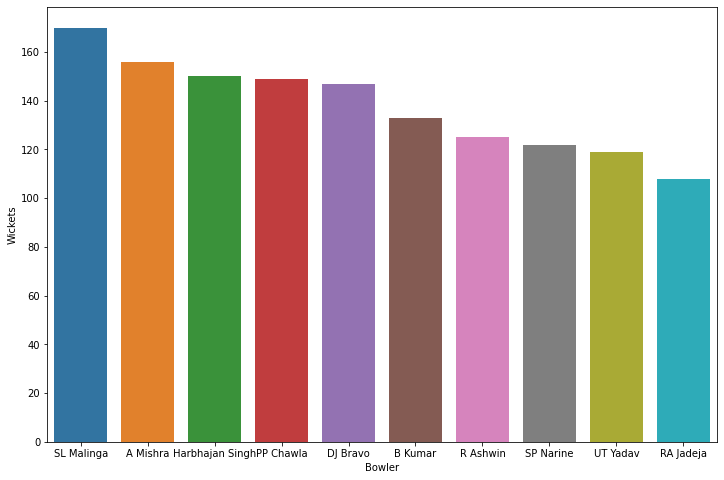

In [ ]:
# Top 10 Wicket takers
top_wickets_df = regular_bowlers[["bowler","Wickets"]]
top_wickets_df = top_wickets_df.sort_values('Wickets',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=top_wickets_df['Wickets'],x=top_wickets_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.show()

In [ ]:
# Most number of runs conceded in an innings 
most_runs_innings_bowler = pd.pivot_table(df_deliveries, index=['bowler','match_id','inning'],values=['batsman_runs'],aggfunc=np.sum)
most_runs_innings_bowler['batsman_runs'] = most_runs_innings_bowler['batsman_runs'].astype(int)
most_runs_innings_bowler.sort_values(by=['batsman_runs'], ascending = False,inplace=True)
most_runs_innings_bowler=most_runs_innings_bowler[:5].reset_index()
most_runs_innings_bowler.index = np.arange(1, len(most_runs_innings_bowler) + 1)
most_runs_innings_bowler

,bowler,match_id,inning,batsman_runs
1,Basil Thampi,7944,1,70
2,M Ur Rahman,11339,1,66
3,UT Yadav,438,1,64
4,I Sharma,435,1,63
5,TG Southee,11153,2,62


In [ ]:
# Most runs given in extras
extras = df_deliveries.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False)
extras_df = extras.to_frame().reset_index().rename(columns={'batting_team':'team'})
extras_df
# Now creating a new dataframe 
matches_extra_df = pd.merge(matches_winners_df,extras_df,how='left',on='team')
matches_extra_df.drop('avg_powerplay_score',axis=1,inplace=True)
matches_extra_df

,team,matches_played,matches_won,win_percent,extra_runs
0,Mumbai Indians,187,109,58.29,1645
1,Sunrisers Hyderabad,183,87,47.54,1387
2,Royal Challengers Bangalore,179,84,46.93,1351
3,Kolkata Knight Riders,178,92,51.69,1524
4,Delhi Capitals,176,77,43.75,1373
5,Kings XI Punjab,176,82,46.59,1425
6,Chennai Super Kings,164,100,60.98,1314
7,Rajasthan Royals,147,75,51.02,1090
8,Rising Pune Supergiants,76,27,35.53,519
9,Gujarat Lions,30,13,43.33,233


In [ ]:
# Now we will be creating a new column in the newly constructed dataframe corresponsing to average extra_runs given by a team per match
matches_extra_df['extra_per_match'] = round(matches_extra_df['extra_runs']/matches_extra_df['matches_played'],2)
matches_extra_df

,team,matches_played,matches_won,win_percent,extra_runs,extra_per_match
0,Mumbai Indians,187,109,58.29,1645,8.80
1,Sunrisers Hyderabad,183,87,47.54,1387,7.58
2,Royal Challengers Bangalore,179,84,46.93,1351,7.55
3,Kolkata Knight Riders,178,92,51.69,1524,8.56
4,Delhi Capitals,176,77,43.75,1373,7.80
5,Kings XI Punjab,176,82,46.59,1425,8.10
6,Chennai Super Kings,164,100,60.98,1314,8.01
7,Rajasthan Royals,147,75,51.02,1090,7.41
8,Rising Pune Supergiants,76,27,35.53,519,6.83
9,Gujarat Lions,30,13,43.33,233,7.77


From the above table, it can seen that variance between the extra runs per match given by the teams is very less except for Kochi Tuskers Kerala; thus there is no point of finding the correlation for these variable. And we can assume that there is no depending between extra runs and match outcome.

Text(0.5, 0, 'teams')

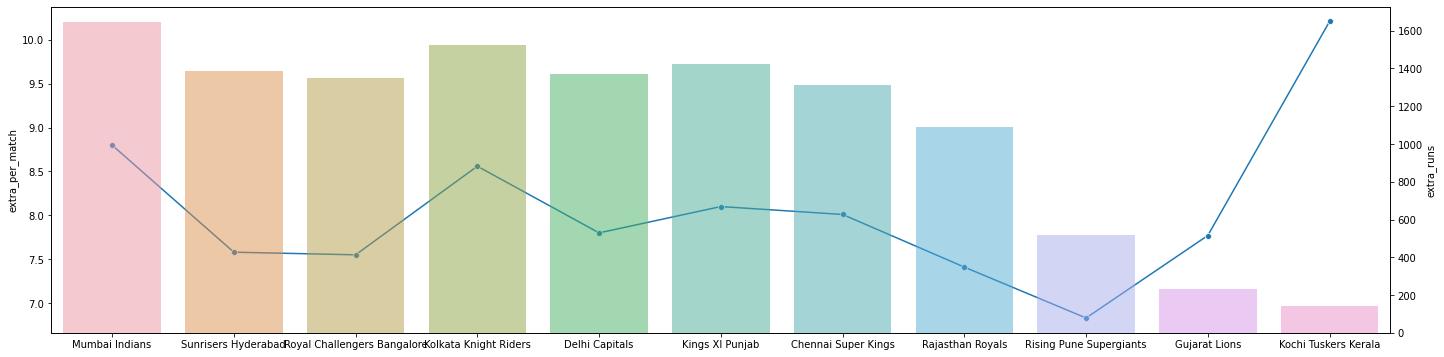

In [ ]:
# creating a graph showing extra runs and teams
ax3 = sns.set_style(style=None, rc=None )

fig, ax3 = plt.subplots(figsize=(24,6))

sns.lineplot(data = matches_extra_df['extra_per_match'], marker='o', sort = False, ax=ax3)
ax4 = ax3.twinx()

sns.barplot(data = matches_extra_df, x='team', y='extra_runs', alpha=0.5, ax=ax4)
plt.xlabel('teams')

**We can create a table to identify the history of a batsman getting out by any particular bowling style**

In [ ]:
# batsman getting out
batsman_df = pd.DataFrame(columns = ['batsman', 'bowler', 'dismissal_kind'])
for index, rows in df_deliveries.iterrows():
  wicket = df_deliveries.loc[index,'dismissal_kind']
  batsman_ = df_deliveries.loc[index,'player_dismissed']
  bowler_ = df_deliveries.loc[index,'bowler']
  if (wicket not in ["run out","obstructing the feild","retired hurt",np.nan]):
    # append rows to an empty DataFrame
    batsman_df = batsman_df.append({'batsman' : batsman_, 'bowler' : bowler_, 'dismissal_kind' : wicket}, 
                ignore_index = True)
batsman_df['dismiss_bowling_style'] = batsman_df.bowler.map(df_players.set_index('Player_Name')['Bowling_Skill'])
batsman_weakness_df = batsman_df.groupby(['batsman','dismiss_bowling_style']).dismissal_kind.agg([len]).unstack()
batsman_weakness_df = batsman_weakness_df.fillna(0)
batsman_weakness_df.reset_index()
# changing multi index columns to standard columns
batsman_weakness_df.columns = ['Left-arm fast-medium','Right-arm medium', 'Legbreak googly', 'Left-arm fast','Right-arm offbreak','Slow left-arm orthodox','Left-arm medium-fast','Right-arm medium-fast','Right-arm fast-medium','Legbreak','Slow left-arm chinaman','Right-arm fast','Left-arm medium']

# converting the values into percentage
cols= ['Left-arm fast-medium', 'Right-arm medium', 'Legbreak googly', 'Left-arm fast','Right-arm offbreak','Slow left-arm orthodox','Left-arm medium-fast','Right-arm medium-fast','Right-arm fast-medium','Legbreak','Slow left-arm chinaman','Right-arm fast','Left-arm medium']
batsman_weakness_df[cols] = round(batsman_weakness_df[cols].div(batsman_weakness_df[cols].sum(axis=1), axis=0).multiply(100),2)
batsman_weakness_df

,Left-arm fast-medium,Right-arm medium,Legbreak googly,Left-arm fast,Right-arm offbreak,Slow left-arm orthodox,Left-arm medium-fast,Right-arm medium-fast,Right-arm fast-medium,Legbreak,Slow left-arm chinaman,Right-arm fast,Left-arm medium
batsman,,,,,,,,,,,,,
A Ashish Reddy,0.00,7.69,0.00,7.69,0.00,0.00,15.38,7.69,30.77,23.08,7.69,0.00,0.00
A Chopra,0.00,0.00,25.00,0.00,0.00,0.00,25.00,0.00,25.00,0.00,0.00,0.00,25.00
A Choudhary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
A Flintoff,0.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00
A Hales,0.00,0.00,0.00,0.00,16.67,0.00,0.00,0.00,33.33,16.67,33.33,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,12.50,0.00,0.00,0.00,0.00,12.50,0.00,12.50,25.00,12.50,25.00,0.00,0.00
Yashpal Singh,0.00,0.00,0.00,0.00,25.00,25.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00
Younis Khan,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Trying to find how a batsman got out?

In [ ]:
# trying to fetch the unique values of the way in which a player can get out
df_deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
dismissals_df = df_deliveries.groupby(['player_dismissed','dismissal_kind'])['match_id'].count().unstack().reset_index()
dismissals_df.fillna(0,inplace=True)
dismissals_df[['bowled','caught','caught and bowled','hit wicket','lbw','obstructing the field','retired hurt','run out','stumped']] = dismissals_df[['bowled','caught','caught and bowled','hit wicket','lbw','obstructing the field','retired hurt','run out','stumped']].astype(int)
# removing retired hurt column
dismissals_df.drop('retired hurt', axis=1, inplace=True)
dismissals_df.rename(columns={'dismissal_kind':'index'},inplace=True)
dismissals_df

dismissal_kind,player_dismissed,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,run out,stumped
0,A Ashish Reddy,5,8,0,0,0,0,2,0
1,A Chopra,0,2,0,0,1,0,2,1
2,A Choudhary,0,1,0,0,0,0,0,0
3,A Flintoff,0,1,1,0,0,0,0,0
4,A Hales,2,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
482,YV Takawale,2,4,0,0,2,0,0,0
483,Yashpal Singh,0,4,0,0,0,0,0,0
484,Younis Khan,1,0,0,0,0,0,0,0
485,Yuvraj Singh,10,84,2,1,5,0,6,3


In [ ]:
dismissals_df.columns.values

array(['player_dismissed', 'bowled', 'caught', 'caught and bowled',
       'hit wicket', 'lbw', 'obstructing the field', 'run out', 'stumped'],
      dtype=object)

***

**Now exploring the dataframe of batsman according to their performance i.e. - total runs scored, average and strike rate.**

In [ ]:
df_mostruns.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [ ]:
df_mostruns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
# creating copy of df_mostruns 
df_mostruns_copy = df_mostruns.copy()

we saw there is some Nan values in average column. So try to replacing with 0.

In [ ]:
# replace Nan values with 0
df_mostruns_copy = df_mostruns.replace(np.nan,0)

Now try to find to 10 most run scorer and players having top 10 averages**.

In [ ]:
df_mostruns_score = df_mostruns_copy.sort_values(['total_runs'], ascending=False)
df_mostruns_score.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


<Figure size 1080x288 with 0 Axes>

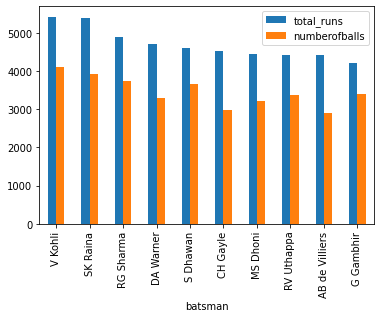

In [ ]:
plt.figure(figsize=(15,4))
df_mostruns_copy.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

In [ ]:
df_mostruns_average = df_mostruns_copy.sort_values(['average'], ascending=False)
df_mostruns_dataframe_avg = df_mostruns_average.loc[df_mostruns_average['total_runs'] > 1000]
df_mostruns_dataframe_avg.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
8,AB de Villiers,4414,104,2902,42.442308,152.101999
30,JP Duminy,2031,49,1633,41.448980,124.372321
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374
61,ML Hayden,1107,27,802,41.000000,138.029925
31,KL Rahul,1988,49,1428,40.571429,139.215686
65,LMP Simmons,1079,27,851,39.962963,126.792009
55,KS Williamson,1309,34,964,38.500000,135.788382
22,SE Marsh,2489,65,1866,38.292308,133.386924
32,MEK Hussey,1977,52,1608,38.019231,122.947761


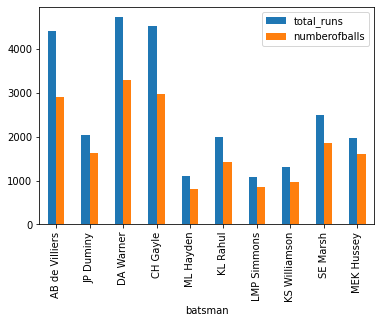

In [ ]:
#df_mostruns_dataframe_avg.iloc[0:10].plot(x="batsman", y=['average'], kind="bar")
#plt.ylabel('Average')
#plt.show()

df_mostruns_dataframe_avg.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

In [ ]:
df_mostruns_strikerate = df_mostruns_copy.sort_values(['strikerate'], ascending=False)
df_mostruns_dataframe_strike = df_mostruns_strikerate.loc[df_mostruns_average['total_runs'] > 1000]
df_mostruns_dataframe_strike.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
38,RR Pant,1767,49,1071,36.061224,164.985994
50,GJ Maxwell,1401,62,864,22.596774,162.152778
64,HH Pandya,1082,38,689,28.473684,157.039187
20,V Sehwag,2728,98,1746,27.836735,156.242841
5,CH Gayle,4525,110,2972,41.136364,152.254374
8,AB de Villiers,4414,104,2902,42.442308,152.101999
52,JC Buttler,1396,37,919,37.729730,151.904244
18,KA Pollard,2772,102,1879,27.176471,147.525279
14,YK Pathan,3222,110,2240,29.290909,143.839286


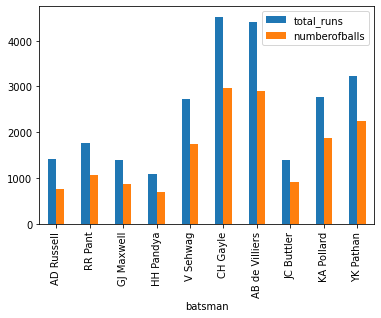

In [ ]:
df_mostruns_dataframe_strike.iloc[0:10].plot(x="batsman", y=['total_runs','numberofballs'], kind = 'bar')
#plt.ylabel('Total Runs')
plt.show()

**INFERENCE**   
From above plots we can find top 10 players having **most runs, top 10 highest average and top 10 highest strikerate** in IPL. Also we find that players having highest average and highest strikerate should played minimum 1000 balls. Because we can saw that some players who play only 100 balls have very high average and high strikerate. So, for better comparison we put a criteria of minimum 1000 balls.

***

**Now exploring the final dataframe which is about team performance  in their home ground and away.**

In [ ]:
df_teamwise

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In above code df_teamwise, here we also saw some team have two different names. So for proper data calculation we have to merge this teams. Firstly we change the names to common name then add that particular row to common one row.

In [ ]:
# create a copy of df_teamwise
df_teamwise_copy = df_teamwise.copy()

In [ ]:
# For changing name of team
df_teamwise_copy['team']=df_teamwise_copy['team'].apply(lambda x:change_name(x))

In [ ]:
df_teamwise_updated = df_teamwise_copy.groupby(['team'], as_index=False).agg('sum').iloc[:,0:5]
home_win_percentage = list(df_teamwise_updated['home_wins']*100/df_teamwise_updated['home_matches'])
away_win_percentage = list(df_teamwise_updated['away_wins']*100/df_teamwise_updated['away_matches'])
df_teamwise_updated['home_win_percentage'] = home_win_percentage
df_teamwise_updated['away_win_percentage'] = away_win_percentage
df_teamwise_updated

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Chennai Super Kings,51,49,89,75,57.303371,65.333333
1,Delhi Capitals,28,49,78,99,35.897436,49.494949
2,Gujarat Lions,1,12,14,16,7.142857,75.000000
3,Kings XI Punjab,38,44,91,85,41.758242,51.764706
4,Kochi Tuskers Kerala,2,4,7,7,28.571429,57.142857
5,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
6,Mumbai Indians,58,51,101,86,57.425743,59.302326
7,Rajasthan Royals,29,46,67,80,43.283582,57.500000
8,Rising Pune Supergiants,11,11,28,34,39.285714,32.352941
9,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947


**Creating a BAR plot to compare teams performance**

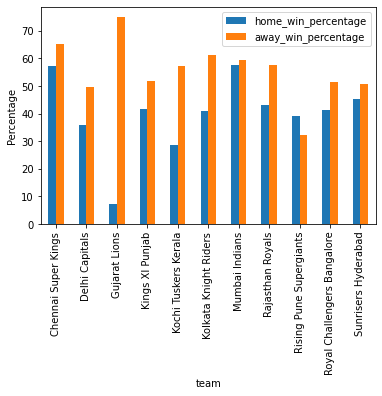

In [ ]:

df_teamwise_updated.plot(x="team", y=["home_win_percentage", "away_win_percentage"], kind="bar")
plt.ylabel('Percentage')
plt.show()

From above Pair plot and bar graph we can compare teams on the basis of Home win percent and Away win percent. From graph we can conclude that **except 'Rising Pune Supergiants' and 'Mumbai Indians' rest all teams** have good winning percent in Away. For **'Rising Pune Supergiants'** home win percent is more and **'Mumbai Indians'** home win percent and Away win percent is almost equal.

**SUMMARY**    
IPL T20 Cricket Analysis project was done by group of 3 members – kunal Agrawal, Shafil Ahmad and myself. In this project we got 5 different csv files as an input. The Csv files are Matches.csv, deliveries.csv, teams.csv, most_run_team_strikerate.csv and teamwise_home_and_away.csv.

So, we decided to divide these 5 csv files among 3 and start exploring dataset. I worked on two csv files which is most_run_team_strikerate.csv and teamwise_home_and_away.csv 

**SHAFIL**
We first decided to take up this project solely due to our mutual interest in cricket(specially IPL).But when I downloaded the project I was shocked to see so many csv files.I had no idea what to do with them,from where to start.Then we decided to divide the csv files among us(3 members) and first work individually gaining insights doing some eda etc.I took matches.csv and players.xlsx.After doing some random EDAs.I gained some confidence.The very first problem that I faced in my matches.csv was that names of some IPL teams have been changed over years,which will be a major obstacle in my EDA. So I made a function which we will be using in our team notebook as well.The function works in such a way that at all places where team name was "Delhi Dredevils" will get changed to "Delhi Capitals" and the same process was repeated with teams representing hyderabad and pune.Some of my key findings were:    
1) Chases have benifitted KKR,RCB,MI as they have chunk of good finishers at the end.Whereas Batting first have benifitted MI,CSK and SRH as the have relatively better top orders and a good indian core batting
2) Some teams worth talking about:
RR- They started from the top but after one successful season,they are constantly on rock bottom
RCB- We see them winning large chunk of matches in most of the seasons.Due to this reason though they havent won any title cup but their entertainment value is among topthree.
MI-There have been lots of up downs for this team at every consecutive season,they have been really unpredictable and so they have always been at the extreme ends of the points table   
**SUMEET**  
When I start to exploring most_run_team_stikerate.csv file, then I found important features such as: batsman, total_runs, numberofballs, average and strikerate. In this total_runs explain the total runs made by batsman in its IPL career. Average and strikerate gives information of average and strikerate 
of each player. By this information I can find to 10 players on the basis of their average, runs and strikerate. So, I started plotting bar graph and with the help of this graph I can show the results in this project.
Also, when I start exploring teamwise_home_and_away.csv then I came to know that this csv dataset has data of home win percent and away win percent of each teams. Important features of this csv are teams, home_wins, home_matches, away_win, away_matches, home_win_percent and away_win_percent. In this dataset I found out which team is good at home ground and which team is good at away ground.   
**KUNAL**   
Initially I started with looking at each database available to us for the IPL project. I went through various columns available within each of the databases tried to make sense of what all data is available to us. I took ‘deliveries.csv’ and understood that it contained details of each ball bowled across various seasons of IPL. I quickly understood that we can found some common statistics pertaining to batting as well as bowling. I found out some of the statistics such as most 4s and 6s hit by batsman. I also tried looking into teams which scored the greatest number of 200+ runs and found out that RCBs have the greatest number of 200+ scores. At same time I wanted to see if the team scoring the greatest number of 200+ runs also has high number of wins. However, Mumbai Indians with highest win percentage comes at 4th position in the number of 200+ scores. In correlation matrix, I observed the greatest number of runs doesn’t necessarily convert into number of wins. Also, I tried to find out whether best performing teams maintain high powerplay scores. 
I tried to draw statistics regarding bowling, however, I observed that many bowlers just bowled for smaller number of overs to provide any meaningful statistics. Hence, to make meaningful conclusions, I restricted to only those bowlers who have done at least 120 deliveries. At the end, I also tried to make certain tables which can help in making real-time decisions such as batsman having issues in facing any type of delivery style in his IPL career.



**Conclusions**

1) We can see that ‘MI’ is the most successful team. After ‘MI’, ‘CSK’ is 2nd
successful team,both of them are known for their strong indian core
players and they make minimal changes in their squad.

2) We also see that during first batting ‘Mumbai Indians’ has high win
percent, but in second batting ‘KKR’ & ‘RCB has high win percent as
they always have big names in their list of finishers.

3) Teams scoring more than 200+ runs have very high win percentage
whereas teams with high win percentage tend to score less in the
powerplay overs.

4) S.Ravi(Sundaram Ravi) has officiated the most number of IPL matches
on-field.

5) Eden Gardens has hosted the maximum number of IPL matches.    
All teams but Kochi maintained almost same average extras given per
match

6) In an year wise performance graph some teams are worth talking about:

RR- They started from the top but after one successful season,they are
constantly on rock bottom

RCB- We see them winning large chunk of matches in most of the
seasons.Due to this reason though they haven’t won any title cup but
their entertainment value is among top three.

MI-There have been lots of up downs for this team at every consecutive
season,they have been really unpredictable and so they have always
been at the extreme ends of the points table.